In [2]:
#Importing the required librarires
import pandas as pd
import numpy as np
import string
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing the prepared_data for each class
df_malware = pd.read_csv("modified_malware.csv")
df_spam = pd.read_csv("modified_spam.csv")
df_phishing = pd.read_csv("modified_phishing.csv")
df_benign = pd.read_csv("modified_benign.csv")

/var/folders/3_/t6g5bjl55j3d78xys96wm9500000gn/T/ipykernel_56521/3623676974.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_benign = pd.read_csv("modified_benign.csv")


In [4]:
#Analysing the size of the data for each class
print(df_benign.shape) 
print(df_malware.shape)
print(df_spam.shape)
print(df_phishing.shape)
#The data is higly imbalanced as the entries for benign domains are far greater than rest

(271063, 38)
(4971, 38)
(4337, 38)
(4968, 38)


In [5]:
# They have considered nine different ways by which each domain can be obfuscated
selected_features = ['oc_8', 'dec_32', 'hex_32', 'oc_32', 'hex_8', 'dec_8', 'obfuscate_at_sign', 'puny_coded','shortened']
feature_types1 = df_malware[selected_features].dtypes
feature_types2 = df_benign[selected_features].dtypes
feature_types3 = df_spam[selected_features].dtypes
feature_types4 = df_phishing[selected_features].dtypes

print(feature_types1)
print(feature_types2)
print(feature_types3)
print(feature_types4)

oc_8                   int64
dec_32                 int64
hex_32                 int64
oc_32                  int64
hex_8                  int64
dec_8                  int64
obfuscate_at_sign      int64
puny_coded             int64
shortened            float64
dtype: object
oc_8                   int64
dec_32                 int64
hex_32               float64
oc_32                  int64
hex_8                  int64
dec_8                  int64
obfuscate_at_sign      int64
puny_coded             int64
shortened            float64
dtype: object
oc_8                 int64
dec_32               int64
hex_32               int64
oc_32                int64
hex_8                int64
dec_8                int64
obfuscate_at_sign    int64
puny_coded           int64
shortened            int64
dtype: object
oc_8                   int64
dec_32                 int64
hex_32                 int64
oc_32                  int64
hex_8                float64
dec_8                  int64
obfuscate_at_sign  

In [6]:
#They have then took the maximum value among them

df_malware['Obfuscation'] = df_malware[selected_features].max(axis=1)
df_malware = df_malware.drop(columns=selected_features)

df_benign['Obfuscation'] = df_benign[selected_features].max(axis=1)
df_benign = df_benign.drop(columns=selected_features)

df_spam['Obfuscation'] = df_spam[selected_features].max(axis=1)
df_spam = df_spam.drop(columns=selected_features)

df_phishing['Obfuscation'] = df_phishing[selected_features].max(axis=1)
df_phishing = df_phishing.drop(columns=selected_features)

In [7]:
#Analysing the shape
print(df_benign.shape)
print(df_malware.shape)
print(df_spam.shape)
print(df_phishing.shape)

(271063, 30)
(4971, 30)
(4337, 30)
(4968, 30)


In [8]:
#Analysing the data type and how many entries are NULL / Non-NULL
print(df_malware.info())
print(df_spam.info())
print(df_phishing.info())
print(df_benign.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_Name        4032 non-null   object 
 1   ASN                 4034 non-null   float64
 2   TTL                 4971 non-null   int64  
 3   IP                  4077 non-null   object 
 4   Domain              4971 non-null   object 
 5   longest_word        4971 non-null   object 
 6   Domain_Name         3939 non-null   object 
 7   subdomain           4971 non-null   int64  
 8   sld                 4971 non-null   object 
 9   Registrant_Name     61 non-null     object 
 10  Domain_Age          3797 non-null   float64
 11  entropy             4971 non-null   float64
 12  Name_Server_Count   4399 non-null   float64
 13  Emails              3351 non-null   object 
 14  Creation_Date_Time  3799 non-null   object 
 15  Organization        2264 non-null   object 
 16  char_d

In [9]:
#These are the 36 new features representing whether a letter present in it and if yes then it stores the frequency of how many 
#times it appears in the domain and if no then it is marked as 0
id = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
#code for the same
chars = list(string.ascii_lowercase) + list(string.digits)

def char_distribution_to_features(char_dist_str):
    cleaned_str = char_dist_str.split(', ', 1)[1].rstrip(')")')
    char_dist = ast.literal_eval(cleaned_str)
    feature_dict = {char: 0 for char in chars}
    feature_dict.update(char_dist)
    return pd.Series(feature_dict)

df_features = df_malware['char_distribution'].apply(char_distribution_to_features)
df_features = df_features[id]
df_malware = pd.concat([df_malware, df_features], axis=1)
df_malware.drop('char_distribution', axis=1, inplace=True)

df_features1 = df_benign['char_distribution'].apply(char_distribution_to_features)
df_features1 = df_features1[id]
df_benign = pd.concat([df_benign, df_features1], axis=1)
df_benign.drop('char_distribution', axis=1, inplace=True)

df_features2 = df_spam['char_distribution'].apply(char_distribution_to_features)
df_features2 = df_features2[id]
df_spam = pd.concat([df_spam, df_features2], axis=1)
df_spam.drop('char_distribution', axis=1, inplace=True)

df_features3 = df_phishing['char_distribution'].apply(char_distribution_to_features)
df_features3 = df_features3[id]
df_phishing = pd.concat([df_phishing, df_features3], axis=1)
df_phishing.drop('char_distribution', axis=1, inplace=True)

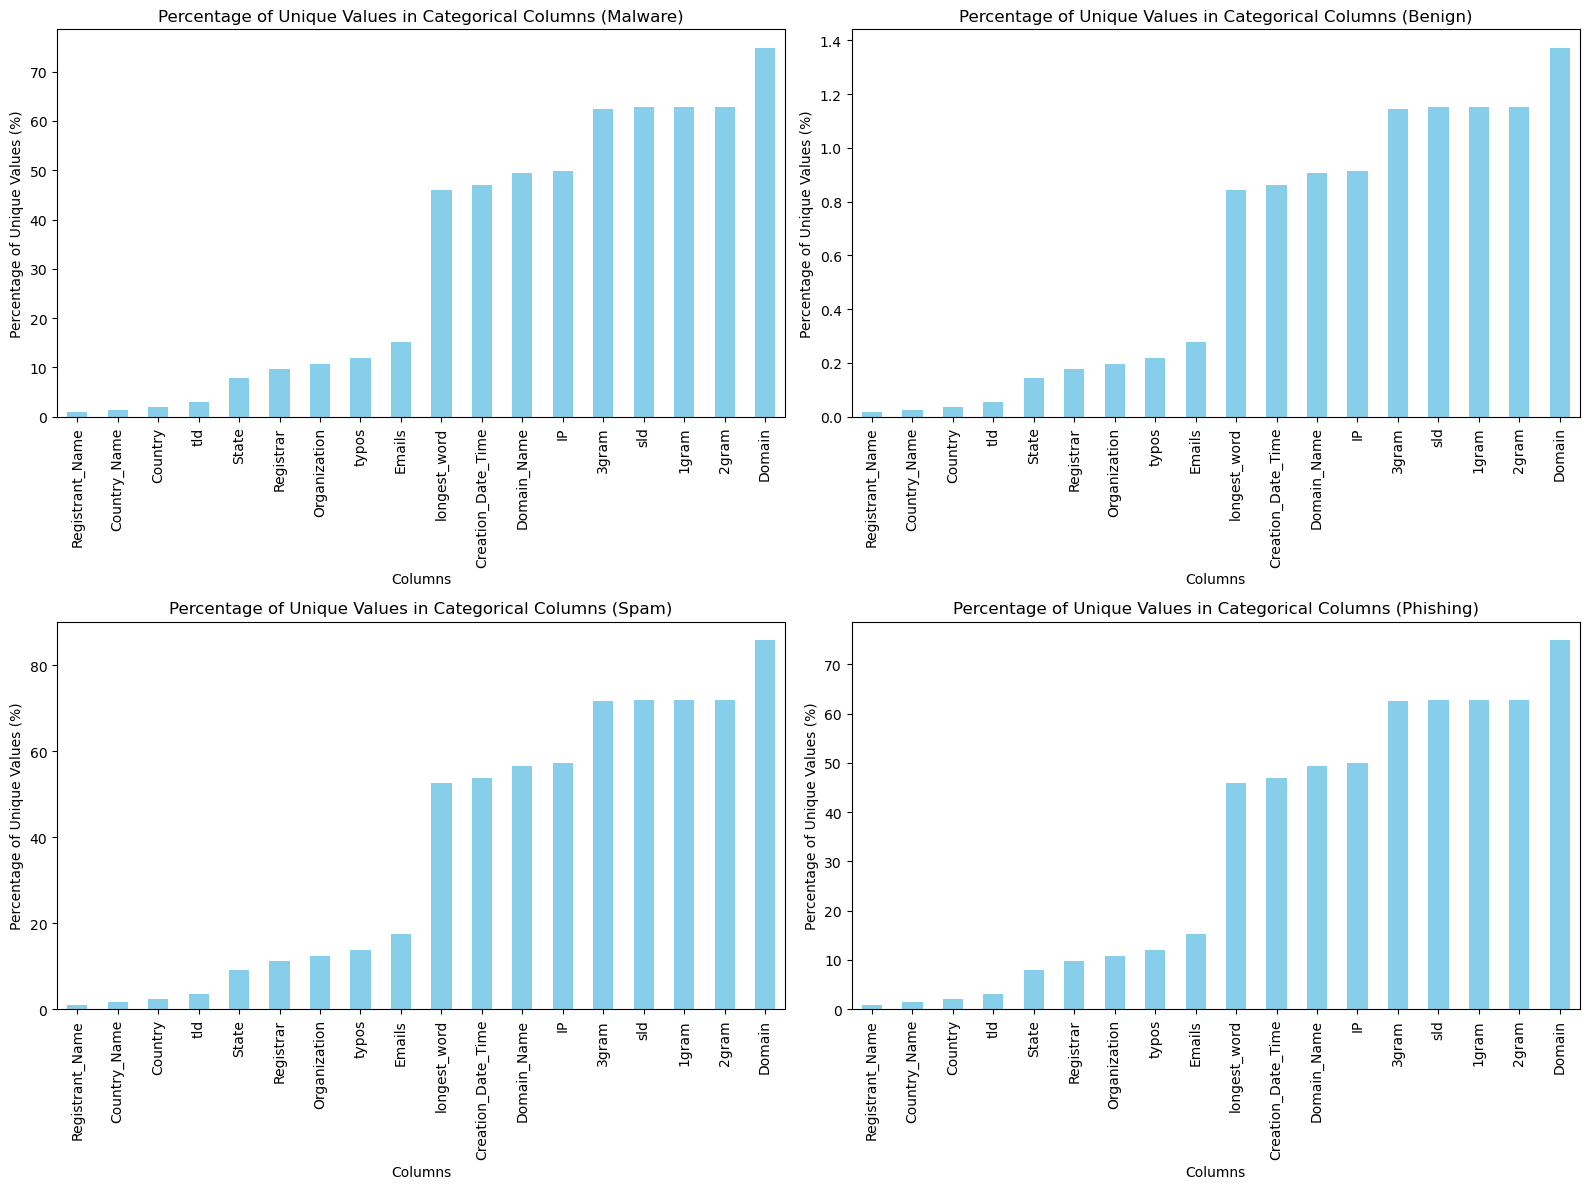

In [11]:
dataframes = {'Malware': df_malware, 'Benign': df_benign, 'Spam': df_spam, 'Phishing': df_phishing}
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
categorical_columns = df_malware.select_dtypes(include=['object', 'category'])

for i, (name, df) in enumerate(dataframes.items()):
    unique_percentage = (categorical_columns.nunique() / len(df) * 100).sort_values()
    unique_percentage.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Percentage of Unique Values in Categorical Columns ({name})')
    axes[i].set_xlabel('Columns')
    axes[i].set_ylabel('Percentage of Unique Values (%)')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()



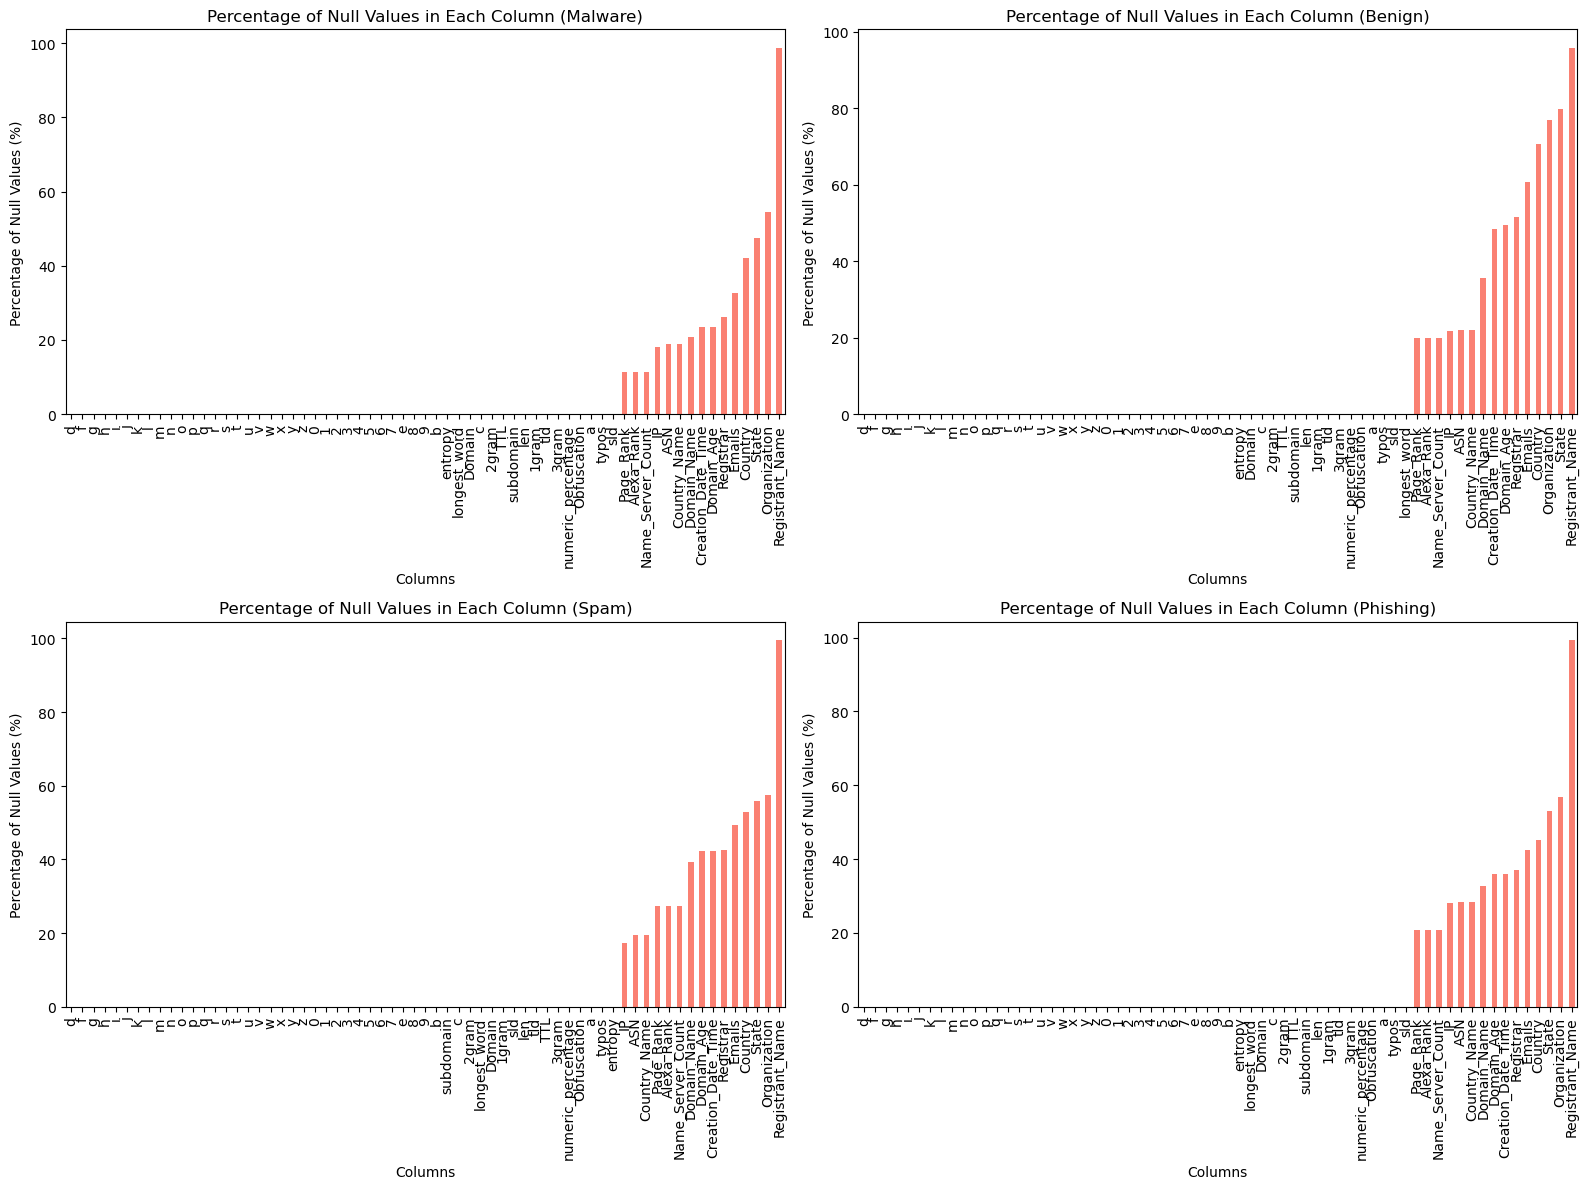

In [12]:
dataframes = {'Malware': df_malware, 'Benign': df_benign, 'Spam': df_spam, 'Phishing': df_phishing}
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
for i, (name, df) in enumerate(dataframes.items()):
    null_percentage = (df.isnull().sum() / len(df) * 100).sort_values()
    null_percentage.plot(kind='bar', color='salmon', ax=axes[i])
    axes[i].set_title(f'Percentage of Null Values in Each Column ({name})')
    axes[i].set_xlabel('Columns')
    axes[i].set_ylabel('Percentage of Null Values (%)')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()


In [13]:
#removing the features which are categorical and have either mostly unique or NULL values
df_malware = df_malware.drop(columns=['IP','Domain','Domain_Name','sld','Registrant_Name','Creation_Date_Time','Organization','Registrar'])
df_spam = df_spam.drop(columns=['IP','Domain','Domain_Name','sld','Registrant_Name','Creation_Date_Time','Organization','Registrar'])
df_phishing = df_phishing.drop(columns=['IP','Domain','Domain_Name','sld','Registrant_Name','Creation_Date_Time','Organization','Registrar'])
df_benign = df_benign.drop(columns=['IP','Domain','Domain_Name','sld','Registrant_Name','Creation_Date_Time','Organization','Registrar'])

In [14]:
#removing the 1-gram as we have already made 36 new features out of it and in our initial code we we dropping 2gram and 3gram features.
df_malware = df_malware.drop(columns=['1gram','2gram','3gram'])
df_spam = df_spam.drop(columns=['1gram','2gram','3gram'])
df_phishing = df_phishing.drop(columns=['1gram','2gram','3gram'])
df_benign = df_benign.drop(columns=['1gram','2gram','3gram'])

In [15]:
df_malware.columns

Index(['Country_Name', 'ASN', 'TTL', 'longest_word', 'subdomain', 'Domain_Age',
       'entropy', 'Name_Server_Count', 'Emails', 'State', 'Country',
       'Page_Rank', 'len', 'typos', 'tld', 'Alexa_Rank', 'numeric_percentage',
       'Obfuscation', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
       'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype='object')

In [16]:
#As longest_word contains mostly unique values we have considered the length of the longest word.
df_malware['longest_word'] = df_malware['longest_word'].apply(lambda x: len(x) if isinstance(x, str) else 0)
df_benign['longest_word'] = df_benign['longest_word'].apply(lambda x: len(x) if isinstance(x, str) else 0)
df_spam['longest_word'] = df_spam['longest_word'].apply(lambda x: len(x) if isinstance(x, str) else 0)
df_phishing['longest_word'] = df_phishing['longest_word'].apply(lambda x: len(x) if isinstance(x, str) else 0)



In [17]:
#removing the features which are categorical and have either mostly unique or NULL values
df_malware = df_malware.drop(columns=['Emails','typos','Alexa_Rank','Page_Rank','State','Country'])
df_spam = df_spam.drop(columns=['Emails','typos','Alexa_Rank','Page_Rank','State','Country'])
df_phishing = df_phishing.drop(columns=['Emails','typos','Alexa_Rank','Page_Rank','State','Country'])
df_benign = df_benign.drop(columns=['Emails','typos','Alexa_Rank','Page_Rank','State','Country'])

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

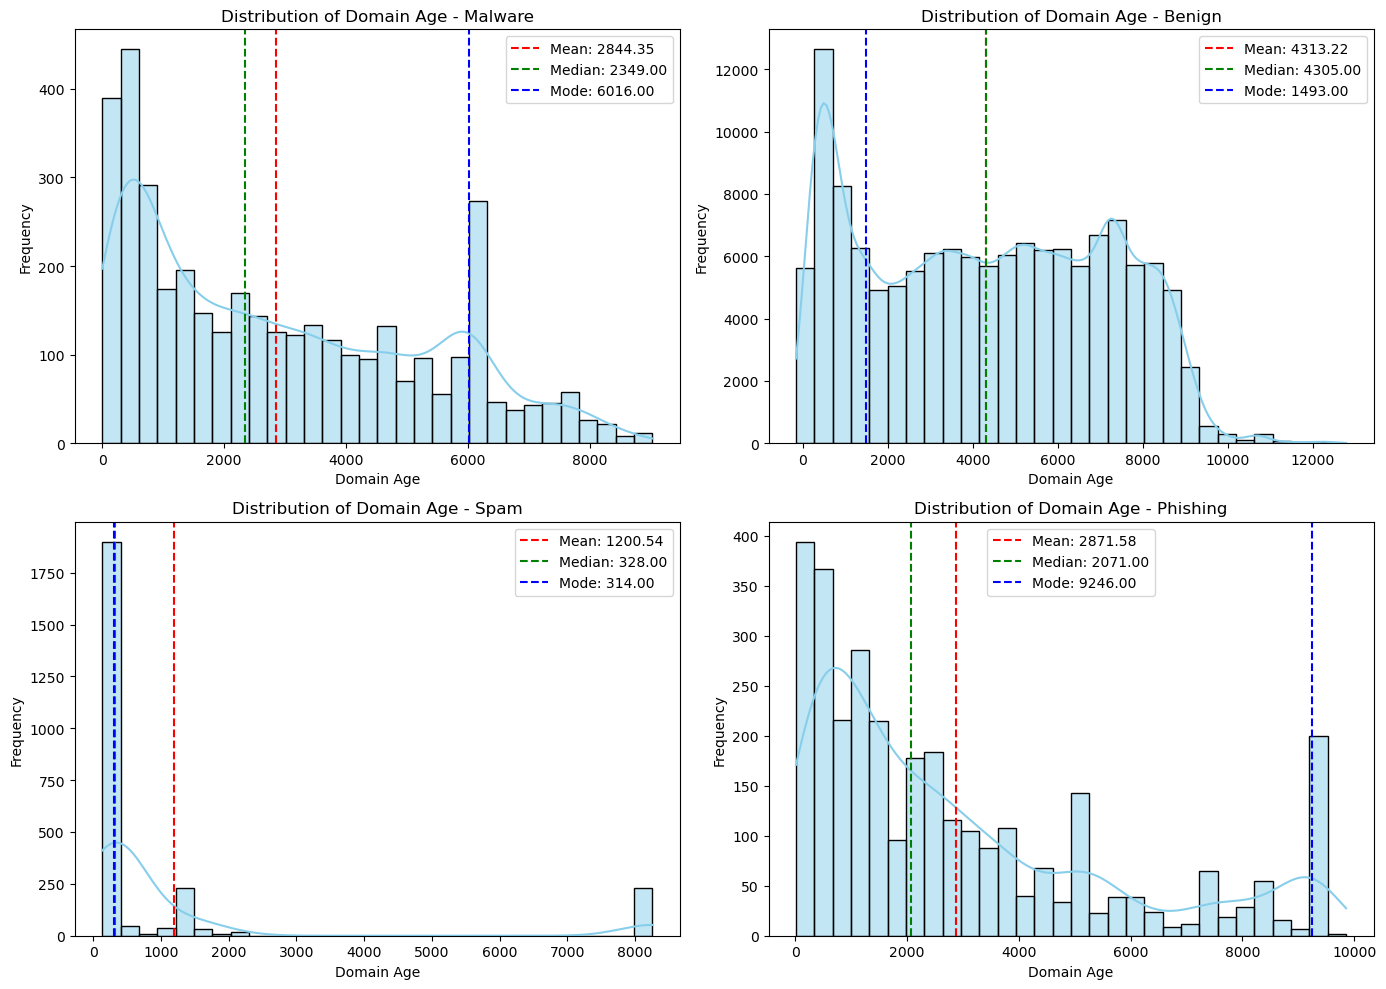

In [18]:
dataframes = [df_malware, df_benign,  df_spam, df_phishing]
titles = ['Malware', 'Benign', 'Spam', 'Phishing']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to easily iterate over axes

for i, df in enumerate(dataframes):
    sns.histplot(df['Domain_Age'], bins=30, kde=True, ax=axes[i], color='skyblue')
    mean_value = df['Domain_Age'].mean()
    median_value = df['Domain_Age'].median()
    mode_value = df['Domain_Age'].mode()[0] 

    axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[i].axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
    axes[i].axvline(mode_value, color='blue', linestyle='--', label=f'Mode: {mode_value:.2f}')


    axes[i].set_title(f'Distribution of Domain Age - {titles[i]}')
    axes[i].set_xlabel('Domain Age')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [19]:
#As the distribution is right skewed we used median to replace NaN values as they are better estimate of the sample in this case
df_malware['Domain_Age'] = df_malware['Domain_Age'].fillna(df_malware['Domain_Age'].median())
df_benign['Domain_Age'] = df_benign['Domain_Age'].fillna(df_benign['Domain_Age'].median())
df_spam['Domain_Age'] = df_spam['Domain_Age'].fillna(df_spam['Domain_Age'].median())
df_phishing['Domain_Age'] = df_phishing['Domain_Age'].fillna(df_phishing['Domain_Age'].median())

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

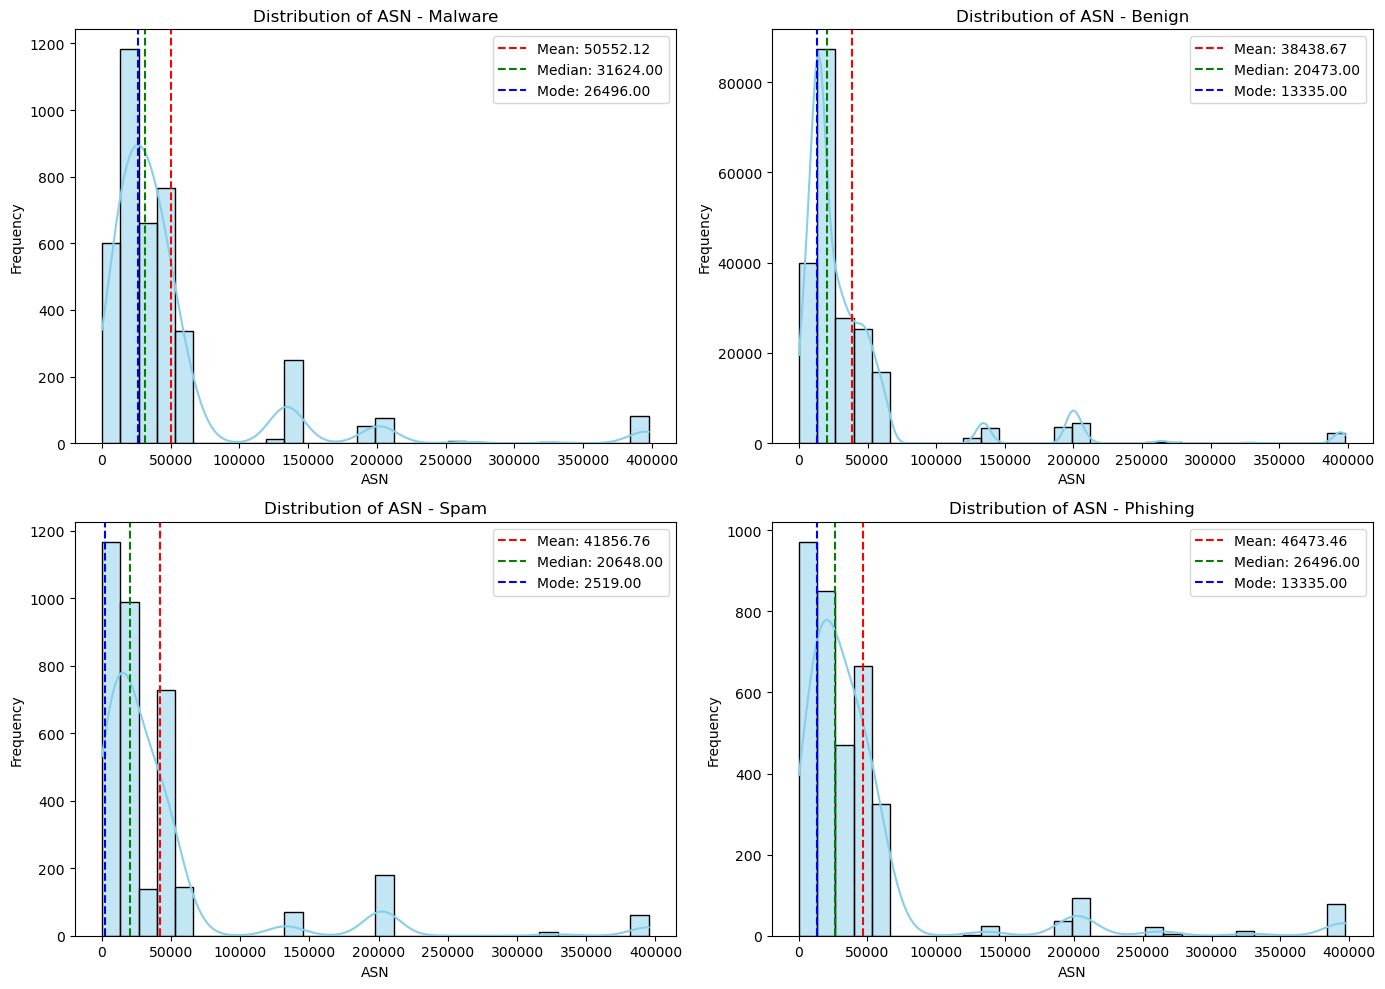

In [20]:
dataframes = [df_malware, df_benign,  df_spam, df_phishing]
titles = ['Malware', 'Benign', 'Spam', 'Phishing']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() 

for i, df in enumerate(dataframes):
    sns.histplot(df['ASN'], bins=30, kde=True, ax=axes[i], color='skyblue')
    mean_value = df['ASN'].mean()
    median_value = df['ASN'].median()
    mode_value = df['ASN'].mode()[0]

    axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[i].axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
    axes[i].axvline(mode_value, color='blue', linestyle='--', label=f'Mode: {mode_value:.2f}')


    axes[i].set_title(f'Distribution of ASN - {titles[i]}')
    axes[i].set_xlabel('ASN')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [21]:
#As the distribution is right skewed we used median to replace NaN values as they are better estimate of the sample
df_malware['ASN'] = df_malware['ASN'].fillna(df_malware['ASN'].median())
df_benign['ASN'] = df_benign['ASN'].fillna(df_benign['ASN'].median())
df_spam['ASN'] = df_spam['ASN'].fillna(df_spam['ASN'].median())
df_phishing['ASN'] = df_phishing['ASN'].fillna(df_phishing['ASN'].median())

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

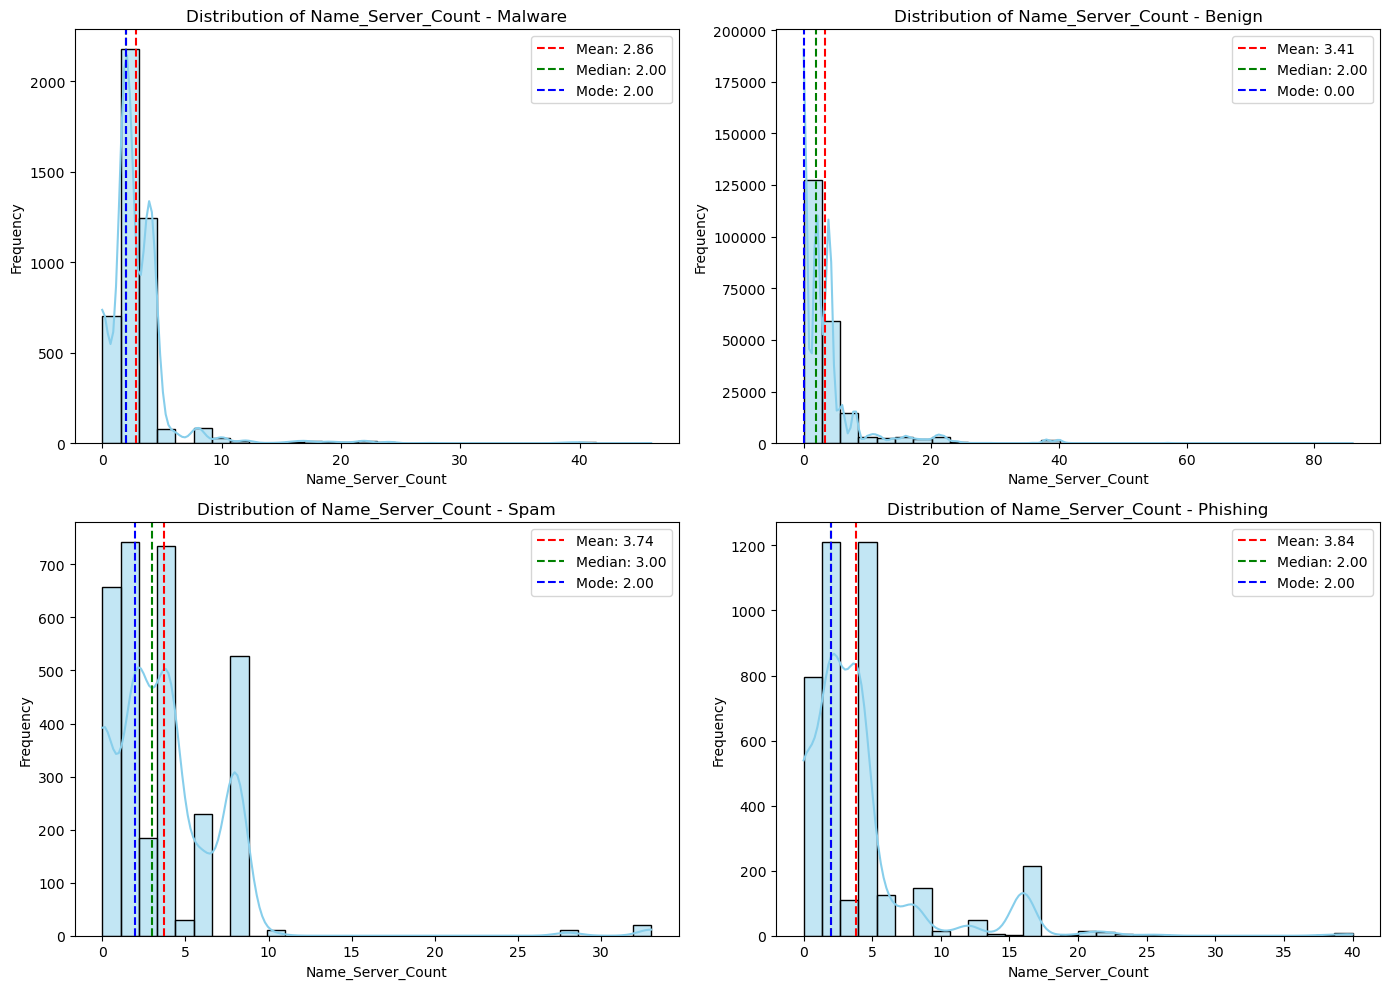

In [22]:
dataframes = [df_malware, df_benign,  df_spam, df_phishing]
titles = ['Malware', 'Benign', 'Spam', 'Phishing']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  

for i, df in enumerate(dataframes):
    sns.histplot(df['Name_Server_Count'], bins=30, kde=True, ax=axes[i], color='skyblue')
    mean_value = df['Name_Server_Count'].mean()
    median_value = df['Name_Server_Count'].median()
    mode_value = df['Name_Server_Count'].mode()[0] 

    axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[i].axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')
    axes[i].axvline(mode_value, color='blue', linestyle='--', label=f'Mode: {mode_value:.2f}')


    axes[i].set_title(f'Distribution of Name_Server_Count - {titles[i]}')
    axes[i].set_xlabel('Name_Server_Count')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [23]:
#As the distribution is right skewed we used median to replace NaN values as they are better estimate of the sample
df_malware['Name_Server_Count'] = df_malware['Name_Server_Count'].fillna(df_malware['Name_Server_Count'].median())
df_benign['Name_Server_Count'] = df_benign['Name_Server_Count'].fillna(df_benign['Name_Server_Count'].median())
df_spam['Name_Server_Count'] = df_spam['Name_Server_Count'].fillna(df_spam['Name_Server_Count'].median())
df_phishing['Name_Server_Count'] = df_phishing['Name_Server_Count'].fillna(df_phishing['Name_Server_Count'].median())

In [24]:
print(df_malware.info())
print(df_spam.info())
print(df_phishing.info())
print(df_benign.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_Name        4032 non-null   object 
 1   ASN                 4971 non-null   float64
 2   TTL                 4971 non-null   int64  
 3   longest_word        4971 non-null   int64  
 4   subdomain           4971 non-null   int64  
 5   Domain_Age          4971 non-null   float64
 6   entropy             4971 non-null   float64
 7   Name_Server_Count   4971 non-null   float64
 8   len                 4971 non-null   int64  
 9   tld                 4971 non-null   object 
 10  numeric_percentage  4971 non-null   float64
 11  Obfuscation         4971 non-null   float64
 12  a                   4971 non-null   float64
 13  b                   4971 non-null   float64
 14  c                   4971 non-null   float64
 15  d                   4971 non-null   float64
 16  e     

In [25]:
print(df_malware['Country_Name'].nunique())
print(df_benign['Country_Name'].nunique())
print(df_spam['Country_Name'].nunique())
print(df_phishing['Country_Name'].nunique())

70
254
25
62


In [26]:
print(df_malware['tld'].nunique())
print(df_benign['tld'].nunique())
print(df_spam['tld'].nunique())
print(df_phishing['tld'].nunique())

150
973
26
159


In [27]:
#Assigning labels to the classes
df_spam['label'] = 1  
df_malware['label'] = 2
df_phishing['label'] = 3
df_benign['label'] = 0 

In [28]:
#Combining all the classes in a single dataframe
df_combined = pd.concat([df_spam, df_malware, df_phishing, df_benign], ignore_index=True)

In [29]:
#Converting the Country_Name into one-hot encoded vector
df_combined = pd.get_dummies(df_combined, columns=['Country_Name'])

In [30]:
#Converting the tld into one-hot encoded vector
df_combined = pd.get_dummies(df_combined, columns=['tld'])

In [31]:
#shape of the combined dataset after preprocessing 
df_combined.shape

(285339, 1292)

In [32]:
#Saving the combined dataset into final.csv for further analysis and model building
df_combined.to_csv('final.csv',index=False)